In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

tweet_response_gold = bearer_token.search_tweets(query='gold', max_results=100)

gold_tweet_data = tweet_response_gold.data

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [2]:
for tweet in gold_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

RT @cctv_idiots: Old but gold 😂 https://t.co/3evtNrtD1y
2022-04-14 20:44:44
RT @adamslawes: @AnnastaciaMP To @AnnastaciaMP (part one of three) thank-you for creating Australia’s first 100% electric bus depot on the…
2022-04-14 20:44:43
https://t.co/4D1JJVJQBd
2022-04-14 20:44:43
RT @shibainu_gold: 🔥 Airdrop: Shiba Inu Gold (SHIBG)
👨‍💼 Per participant: 4,000,000,000 SHIBG
👥‍ Referral:  3,800,000,000 SHIBG
⏰ End date:…
2022-04-14 20:44:43
RT @kanbankan1000: 話題のフィーメイルラッパーLio(リオ) のデビュー作「Bye Friend」がリリース。BADHOPからGold diggaがPRODUCEを担当 必聴！リアルな人間関係と社会に対するリリックに注目! | 驚き！ビックリ！おもしろ・楽しい…
2022-04-14 20:44:42
LadyGold_com: My new #video Deine Belohnung! 🎥 just sold ✅
👉🏼 https://t.co/ISGFMAHgo6 👈🏼 via @CMS_Stars
2022-04-14 20:44:41
RT @_bieber_rauhl: vendo il biglietto dei maneskin al circo massimo prezzo 60 euro!
settore: pit 1 - gold circle! #vendobiglietti
2022-04-14 20:44:41
@apefollowsape @AzukiApeSC I was super excited to see the first sneak peek 👇 but the traits look off... The mouths don't loo

In [14]:
gold_df = pd.DataFrame(gold_tweet_data)
gold_df['id']=gold_df['id'].apply(lambda x: convert_id_to_date(x))


gold_df_text = gold_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
gold_df_text

,id,text
0,2022-04-14 20:44:44,RT @cctv_idiots: Old but gold 😂 https://t.co/3...
1,2022-04-14 20:44:43,RT @adamslawes: @AnnastaciaMP To @AnnastaciaMP...
2,2022-04-14 20:44:43,https://t.co/4D1JJVJQBd
3,2022-04-14 20:44:43,RT @shibainu_gold: 🔥 Airdrop: Shiba Inu Gold (...
4,2022-04-14 20:44:42,RT @kanbankan1000: 話題のフィーメイルラッパーLio(リオ) のデビュー作...
...,...,...
95,2022-04-14 20:43:53,@limelade i had a dream yesterday where i open...
96,2022-04-14 20:43:52,RT @ckay_yo: gold! merci 🇫🇷💙✨ https://t.co/TDH...
97,2022-04-14 20:43:52,RT @cctv_idiots: Old but gold 😂 https://t.co/3...
98,2022-04-14 20:43:52,"🔼 $1,970.29 - سعر أوقية الذهب مقابل الدولار في..."


In [15]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
gold_df_text['text'] = gold_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
gold_df_text['text']= gold_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
gold_df_text['text'] = gold_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
gold_df_text['text'] = gold_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

gold_df_text = gold_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
gold_df_text.head(20)

,id,text
0,2022-04-14 20:44:44,RT cctvidiots Old but gold httpstco3evtNrt1y
1,2022-04-14 20:44:43,RT adamslawes AnnastaciaMP To AnnastaciaMP par...
2,2022-04-14 20:44:43,httpstco41JJVJQBd
3,2022-04-14 20:44:43,RT shibainugold Airdrop Shiba Inu Gold SHIBG ...
4,2022-04-14 20:44:42,RT kanbanka1000 Lio Bye FriendBADHOPGold digga...
5,2022-04-14 20:44:41,LadyGoldcom My new video Deine Belohnung sold...
6,2022-04-14 20:44:41,RT bieberrauhl vendo il biglietto dei maneskin...
7,2022-04-14 20:44:41,apefollowsape AzukiApeSC I super excited see f...
8,2022-04-14 20:44:41,RT gsplating N Nickel Nickel Plating Solution ...
9,2022-04-14 20:44:40,LadyGoldcom Neuer clip Lieblingsstrumpfhose v...


In [17]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in gold_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
gold_df_text = gold_df_text.join(text_sentiment_df)

In [18]:
gold_df_text.head()

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-14 20:44:44,RT cctvidiots Old but gold httpstco3evtNrt1y,0.000,0.000,1.000,0.0,0
1,2022-04-14 20:44:43,RT adamslawes AnnastaciaMP To AnnastaciaMP par...,0.296,0.128,0.872,0.0,1
2,2022-04-14 20:44:43,httpstco41JJVJQBd,0.000,0.000,1.000,0.0,0
3,2022-04-14 20:44:43,RT shibainugold Airdrop Shiba Inu Gold SHIBG ...,0.000,0.000,1.000,0.0,0
4,2022-04-14 20:44:42,RT kanbanka1000 Lio Bye FriendBADHOPGold digga...,0.000,0.000,1.000,0.0,0


In [19]:
gold_df_text.to_csv("Results\generalpop_gold_sentiment_analysis_mostrecent2022.csv")

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

gold_df_text['token_text'] = gold_df_text.text.apply(tokenizer)
gold_df_text

,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,RT cctvidiots Old but gold httpstco3evtNrt1y,0.000,0.000,1.000,0.0,0,"[RT, cctvidiots, Old, gold, httpstco3evtNrt1y]"
1,RT adamslawes AnnastaciaMP To AnnastaciaMP par...,0.296,0.128,0.872,0.0,1,"[RT, adamslawes, AnnastaciaMP, To, AnnastaciaM..."
2,httpstco41JJVJQBd,0.000,0.000,1.000,0.0,0,[httpstco41JJVJQBd]
3,RT shibainugold Airdrop Shiba Inu Gold SHIBG ...,0.000,0.000,1.000,0.0,0,"[RT, shibainugold, Airdrop, Shiba, Inu, Gold, ..."
4,RT kanbanka1000 Lio Bye FriendBADHOPGold digga...,0.000,0.000,1.000,0.0,0,"[RT, kanbanka1000, Lio, Bye, FriendBADHOPGold,..."
...,...,...,...,...,...,...,...
95,limelade dream yesterday opened shop brawl sta...,0.250,0.143,0.857,0.0,1,"[limelade, dream, yesterday, opened, shop, bra..."
96,RT ckayyo gold merci httpstcoTDHpWjwDZE,0.000,0.000,1.000,0.0,0,"[RT, ckayyo, gold, merci, httpstcoTDHpWjwDZE]"
97,RT cctvidiots Old but gold httpstco3evtNrt1y,0.000,0.000,1.000,0.0,0,"[RT, cctvidiots, Old, gold, httpstco3evtNrt1y]"
98,197029 Thursday14 April 20221042 AM ...,0.000,0.000,1.000,0.0,0,"[197029, Thursday14, April, 20221042, AM, http..."


In [10]:
gold_df_text.to_csv("Results\generalpop_DOGE_sentiment_analysis.csv")

In [11]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
gold_df_text['text']= gold_df_text['text'].apply(lambda x: stemming_on_text(x))
gold_df_text['text'].head()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_gold = gold_df_text['token_text']
token_text_df_gold

gold_df_text = ' '.join(str(e) for e in token_text_df_gold)
gold_df_text

"['RT', 'cctvidiots', 'Old', 'gold', 'httpstco3evtNrt1y'] ['RT', 'adamslawes', 'AnnastaciaMP', 'To', 'AnnastaciaMP', 'part', 'one', 'three', 'thankyou', 'creating', 'Australias', 'first100', 'electric', 'bus', 'depot'] ['httpstco41JJVJQBd'] ['RT', 'shibainugold', 'Airdrop', 'Shiba', 'Inu', 'Gold', 'SHIBG', 'Per', 'participant', '4000000000', 'SHIBG', 'Referral', '3800000000', 'SHIBG', 'End', 'date'] ['RT', 'kanbanka1000', 'Lio', 'Bye', 'FriendBADHOPGold', 'diggaPRODUCE'] ['LadyGoldcom', 'My', 'new', 'video', 'Deine', 'Belohnung', 'sold', 'httpstcoISGFMAHgo6', 'via', 'CMSStars'] ['RT', 'bieberrauhl', 'vendo', 'il', 'biglietto', 'dei', 'maneskin', 'al', 'circo', 'massimo', 'prezzo', '60', 'euro', 'settore', 'pit1', 'gold', 'circle', 'vendobiglietti'] ['apefollowsape', 'AzukiApeSC', 'I', 'super', 'excited', 'see', 'first', 'sneak', 'peek', 'trait', 'look', 'The', 'mouth', 'dont', 'look', 'like', 'fit', 'Even', 'gold', 'teeth', 'completely', 'different', 'Not', 'sure', 'intention', 'look',

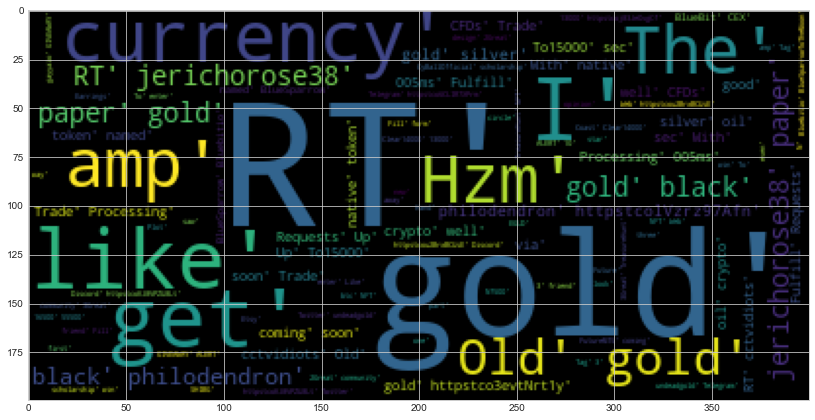

In [12]:
wc = WordCloud().generate(gold_df_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)